In [1]:
# Code to extract the dataset using kaggle API
# from kaggle.api.kaggle_api_extended import KaggleApi
# api = KaggleApi()
# api.authenticate()
# api.competition_download_files('titanic', './dataset_exercise_3/')

In [2]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train_data, test_data = pd.read_csv("./dataset_exercise_3/train.csv"), pd.read_csv(
    "./dataset_exercise_3/test.csv"
)

In [4]:
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

In [5]:
train_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [6]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

The Name is useless, as someone die is not their names. Cabin number will also be dropped due to the lack of data (only 204 data in 891 instances).

In [10]:
train_data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [11]:
train_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [12]:
train_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline(
    [("impute", SimpleImputer(strategy="median")), ("std_scale", StandardScaler())]
)

In [14]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

cat_pipeline = Pipeline(
    [
        ("ordinal_encode", OrdinalEncoder()),
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("one_hot_encode", OneHotEncoder(sparse_output=False)),
    ]
)

In [15]:
from sklearn.compose import ColumnTransformer

num_attributes = ["Age", "SibSp", "Parch", "Fare"]
cat_attributes = ["Pclass", "Sex", "Embarked"]

preprocessing = ColumnTransformer(
    [("num", num_pipeline, num_attributes), ("cat", cat_pipeline, cat_attributes)]
)

In [16]:
y_train = train_data["Survived"]

In [17]:
X_train = preprocessing.fit_transform(train_data)
X_train

array([[-0.56573646,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66386103,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276197, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [18]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
X_test = preprocessing.transform(test_data)
y_pred = forest_clf.predict(X_test)

We can convert the y_pred into a csv file and hope. But we can do better than hope! We can cross-validation on the train set to see how the model performs.

In [20]:
from sklearn.model_selection import cross_val_score

forest_score = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_score.mean()

0.8092759051186016

Ok, roughly 81% accuracy. Let's try another model to compare.

In [21]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_score = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_score.mean()

0.8249313358302123

Look like svm is performing slightly better than random forest. But instead of look only at mean, we can plot it using box plot.

Box plot highlighting the lower and upper quartiles, and `whisker` showing the extent of the scores. Note that boxplot() function detect outliers (called 'filers') and does not include them with the whiskers. Specifically, if the lower quartile is $Q_1$ and the upper quartile is $Q_3$, then the interquartile range is $IQR = Q_3 - Q_1$, which is also the box height. Any score lower than $Q_1 - 1.5 \times IQR$ or higher than $Q_3 + 1.5 \times IQR$ is a filers.

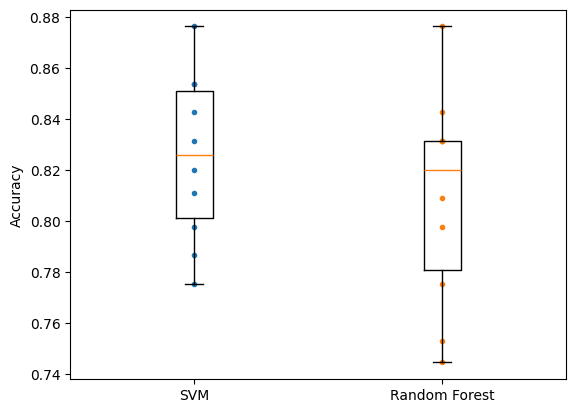

In [27]:
plt.plot([1] * 10, svm_score, ".")
plt.plot([2] * 10, forest_score, ".")
plt.boxplot([svm_score, forest_score], labels=("SVM", "Random Forest"))
plt.ylabel("Accuracy")

plt.show()

From the box plot, although random forest score very high on one of the 10 folds, overall it has wider spread, so SVM would generalize better. 